## Learning Portfolio 6: Solving Bin Packing Problem by using CVSPY

### 1. Problem
- Assume a finite set $I$ of items, a size $s(i) \in \mathbb{N}^+$, There is also a positive bin capacity $B$, and a positive integer $K$, $K$ represents the least bin that used to put all of items $I$ inside.

### 2. Question
- What is a minimum partition of $I$ into disjoint set $I_{1} \dots I_{K}$? and the minimum number of bin we used is the optimization.

### 3. Mathematical Expression of Bin Packing Problem
Objective Function:
$$
\begin{array}{rc}
\text{Minimum:} & K = \sum_{j = 1}^{n} y_{j}  \\
\text{Subject to:} & K \ge 1\\
& \sum_{j = 1}^{n} x_{ij} = 1 \\
& \sum_{i \in I}^{n} s(i) x_{ij} \leq By_{j}    \qquad   \forall j\in \{1 \dots n\} \\
\\
&\qquad y_{j} \in \{0,1\}, \qquad  \forall j\in \{1 \dots n\} \\
& x_{ij} \in \{0,1\}, \qquad \forall i \in I\\ 
\end{array}
$$



- The goal is to minimize the total used bin $\sum y_{j}$, each $y_{j}$ is either 0 or 1 for representing it is not used or used. 
- $x_{ij}$ records whether item $i$ is inside bin $j$, for a specific item $i$ can only be put in one bin $j$,   $\forall j\in \{1 \dots n\}$ 
- $B$ is a constant bin capacity
- $\sum_{i \in I}^{n} s(i) x_{ij}$ is the sum of items that put in bin $y_{j}$. Therefore, we constraints that the items inside can not be greater than the bin capacity $B$ for all bins. $\sum_{i \in I}^{n} s(i) x_{ij} \leq By_{j}$

In [1]:
pip install cvxpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [3]:
# Data
volumn_in_order = [6, 10, 12, 5, 5, 3, 8, 4] # items volumn

B = 20 # capacity of bins

n = len(volumn_in_order) 

#### The visualization of each items and its volumn $s(i)$

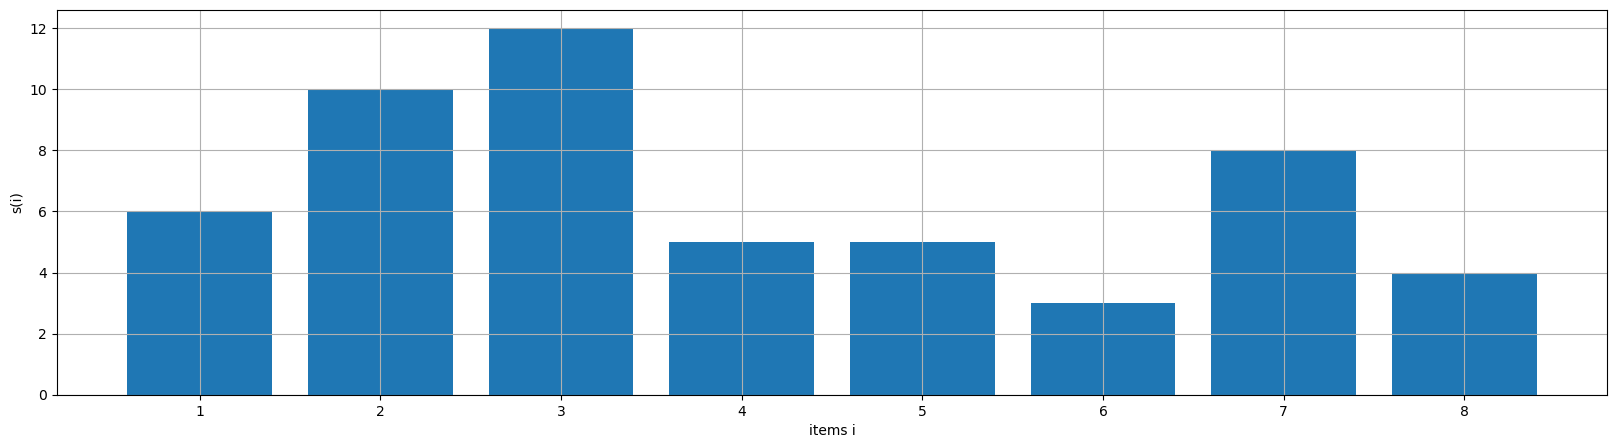

In [4]:
plt.figure(figsize=(20,5))
plt.xlabel("items i") 
plt.ylabel("s(i)")
plt.bar(range(1, n+1),volumn_in_order), plt.grid(True), plt.savefig('fig1.png',dpi=300)
plt.show()

### Variables

In [5]:
#Optimization, the number of box to minimize
K = n + 1
bin_used = cp.Variable(n, boolean = True) 
matrix_ij = cp.Variable((n,n),boolean = True) #x_ij, i = box , j =items i->j 
x = cp.Variable(n, boolean = True)

### Fail Test of the arrangement of $x_{ij}$ in CVXPY
- In the first case, I arrage the $x_{ij}$ as item $i$ put in the bin $j$. It can not approach to a optimatization CVSPY output, and I test it in a small case. It turns out the false volumn

matrix_ij
$$
\text{bin item (matrix_ij)} = \left[ \begin{array}{rrr} x_{1,1} & \dots & x_{1,n} \\ x_{2,1} & \dots & x_{2,n} \\ \dots \\ x_{n,1} &\dots & x_{n,n} \\\end{array} \right]
\hspace{1in}
$$


In [6]:
#----------------------
# Bin #1 : item 1 / 3 / 4
# Bin #2 : item 2
#----------------------
Map = [[1,0,0,0],
       [0,1,0,0],
       [1,0,0,0],
       [1,0,0,0]]

Marr = np.array(Map)

Item_order = [1,2,3,4] #item volumn 

Item_order_arr = np.array(Item_order)

Marr @ Item_order_arr #output is supposed to be ([8,2,0,0]) as Bin#1 : 1+3+4  Bin#2: 2 Bin#3: 0 Bin #4: 0

array([1, 2, 1, 1])

### Another try: What if we switch the order of $x_{ij}$ to $x_{ji}$? 
- For the meaning that bin $j$ has the item $i$, swith the column and row

In [7]:
#----------------------
# Bin #1 : item 1 / 3 / 4
# Bin #2 : item 2
#----------------------
Map2 = [[1,0,1,1],
        [0,1,0,0],
        [0,0,0,0],
        [0,0,0,0]]

Marr2 = np.array(Map2)

Marr2 @ Item_order_arr 

array([8, 2, 0, 0])

### Constraints
The success of the order switch gives the project a correct volumn contained in each bin, and in this way we can set the correct constraint that
- The number of bin used should be greater than 1
- The volumn of all items associated to a bin should not exceed the capacity of the bin
- Each item allocated once in one bin, the sum of each column of matrix_ij should be 1.

In [8]:
# CONSTRAINTS
constraints = [cp.sum(bin_used) >= 1,
               
               cp.sum(matrix_ij, axis = 0) == 1 ,# the sum of each column = 1  
                
               matrix_ij @ volumn_in_order <= B, # The volumn of all items associated to one bin should not exceed the capacity of the bin B
               
               cp.sum(matrix_ij, axis=1) <= bin_used * n] #if the bin is used, the bin cannot contain all the items inside

problem = cp.Problem(cp.Minimize(cp.sum(bin_used)), constraints)

### Problem Solving

In [9]:
problem = cp.Problem(cp.Minimize(cp.sum(bin_used)), constraints)
problem.solve()
print(problem.status)
print(problem.value)
print(matrix_ij.value)

optimal
3.0
[[0. 1. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


## Final Result

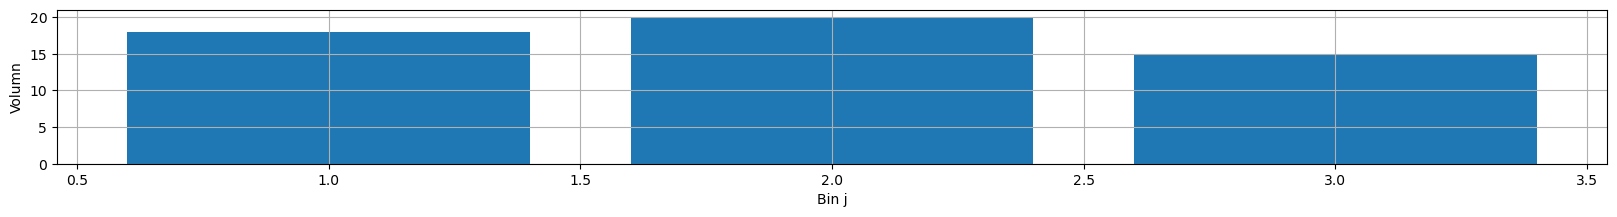

In [10]:
result_1 = [18,20,15]
plt.figure(figsize=(20,2))
plt.xlabel("Bin j") 
plt.ylabel("Volumn")
plt.bar(range(1, 4),result_1), plt.grid(True), plt.savefig('fig2.png',dpi=300)
plt.show()

### Other Examples

In [11]:
volumn_in_order1 = np.random.randint(low=1, high=20, size=9)# items volumn

volumn_in_order1

array([15,  1,  3,  3,  2,  8,  5, 17,  4])

In [12]:
def BinPicking_solver(volumn_in_order, B):
    n = len(volumn_in_order) 
    
    #Optimization, the number of box to minimize
    K = n + 1
    bin_used = cp.Variable(n, boolean = True) 
    matrix_ij = cp.Variable((n,n),boolean = True) #x_ij, i = box , j =items i->j 
    x = cp.Variable(n, boolean = True)
    
    # CONSTRAINTS
    constraints = [cp.sum(bin_used) >= 1,

                   cp.sum(matrix_ij, axis = 0) == 1 ,# the sum of each column = 1  

                   matrix_ij @ volumn_in_order <= B, # The volumn of all items associated to one bin should not exceed the capacity of the bin B

                   cp.sum(matrix_ij, axis=1) <= bin_used * n] #if the bin is used, the bin cannot contain all the items inside

    problem = cp.Problem(cp.Minimize(cp.sum(bin_used)), constraints)
    
    
    problem = cp.Problem(cp.Minimize(cp.sum(bin_used)), constraints)
    problem.solve()
    print(problem.status)
    print(problem.value)
    print(matrix_ij.value)

BinPicking_solver(volumn_in_order1,20)

optimal
3.0
[[0. 0. 1. 1. 1. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
